In [1]:
# from update_data import *
from static import *
from stock_data import *
from capm_func import *
from efficient_frontier import summary_market
from icecream import ic

with open(PATH_DICTIONARY, "r") as a:
    name_dict = json.load(a)
with open(PATH_INDEX, "r") as a:
    index_l = json.load(a)

In [2]:
stock = StockData("./data/stock/", "./stock_dictionary.json")
stock_data, _ = stock.get_data()
indies_data = stock.get_indices_data()
whole_data = pd.concat([stock_data] + indies_data, axis=0)

In [3]:
market_df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["ticker"].isin(index_l["VN100"]))
][["ticker", "market_value", "log_return", "time", "exchange"]].dropna(
    subset=["log_return"]
)
market_df_stat, market_df = summary_market(market_df)

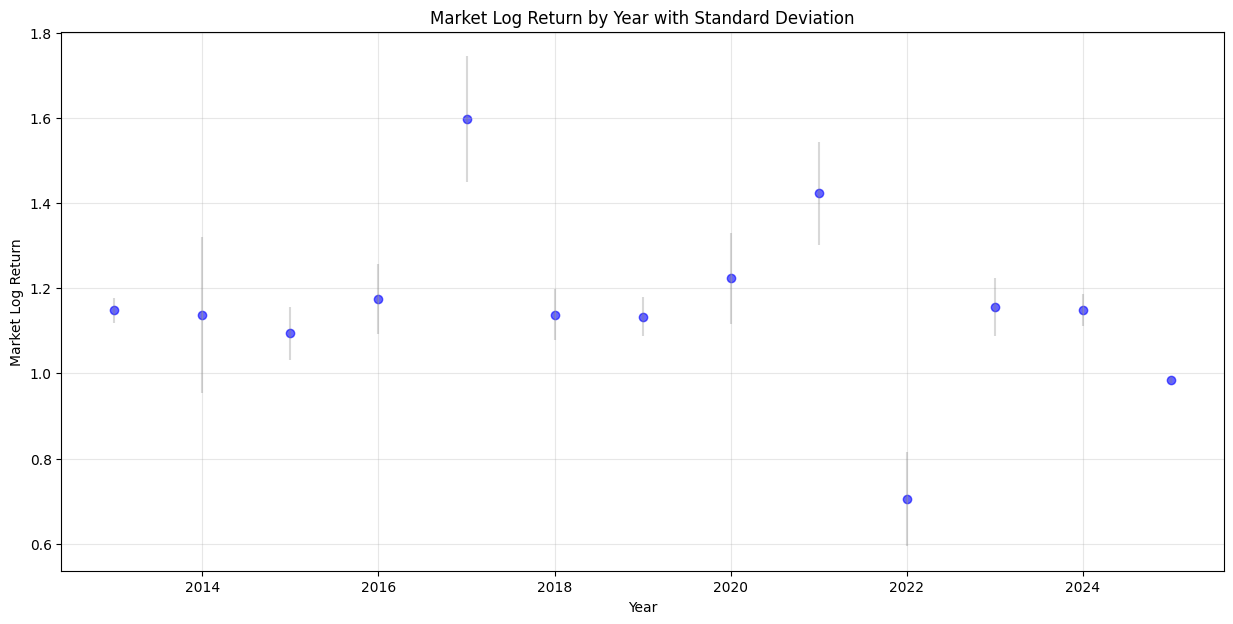

In [4]:
# market_df
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(
    market_df_stat["year"], market_df_stat["market_log_return"], c="blue", alpha=0.6
)
plt.errorbar(
    market_df_stat["year"],
    market_df_stat["market_log_return"],
    yerr=market_df_stat["std"],
    fmt="none",
    c="gray",
    alpha=0.3,
)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Market Log Return")
plt.title("Market Log Return by Year with Standard Deviation")

# Add grid
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

test = capm(
    market_df.dropna(subset=["market_log_return"]),
    stock_data.loc[stock_data["ticker"].isin(index_l["VN30"])],
    window=1,
    para=True,
)

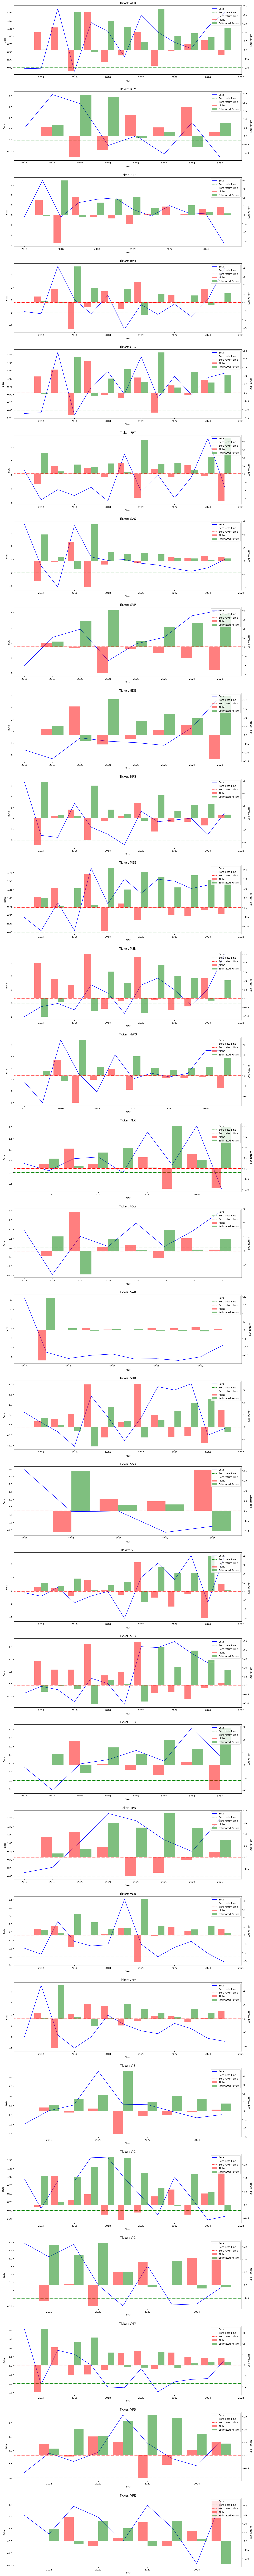

In [6]:
plot_capm_results(test)